In [ ]:
import pandas as pd

# Load the CSV file to inspect its contents
file_path = '/content/results_200_ft_qsplit_v4.csv'
ft_qsplit = pd.read_csv(file_path)

file_path = '/content/results_200_base_qsplit_withoutfinetuning.csv'
zero_qsplit = pd.read_csv(file_path)

file_path = '/content/results_ll3_70b_ft_metricsplit_v2.csv'
ft_metric = pd.read_csv(file_path)

file_path = '/content/results_200_base_withoutft_metric.csv'
zero_metric = pd.read_csv(file_path)


zero_metric.head(), zero_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              192 non-null    int64 
 1   Question        192 non-null    object
 2   Correct answer  192 non-null    object
 3   Type 0-7        192 non-null    int64 
 4   Prediction      192 non-null    object
dtypes: int64(2), object(3)
memory usage: 7.6+ KB


(   id                                           Question Correct answer  \
 0   0  ['<|begin_of_text|><|begin_of_text|><|start_he...            low   
 1   1  ['<|begin_of_text|><|begin_of_text|><|start_he...         medium   
 2   2  ['<|begin_of_text|><|begin_of_text|><|start_he...            low   
 3   3  ['<|begin_of_text|><|begin_of_text|><|start_he...            low   
 4   4  ['<|begin_of_text|><|begin_of_text|><|start_he...           high   
 
    Type 0-7 Prediction  
 0         2        low  
 1         3        low  
 2         1        low  
 3         2        low  
 4         5        low  ,
 None)

In [ ]:
ft_qsplit.columns = ['Identifier', 'Prompt', 'Label', 'Model Output Number', 'Model Output Text']
zero_qsplit.columns = ['Identifier', 'Prompt', 'Label', 'Model Output Number', 'Model Output Text']
ft_metric.columns = ['Identifier', 'Prompt', 'Label', 'Model Output Number', 'Model Output Text']
zero_metric.columns = ['Identifier', 'Prompt', 'Label', 'Model Output Number', 'Model Output Text']


In [ ]:
def trim_from_quotes(text):
    # Find the starting index of the pattern "''" and trim from there to the end
    start_index = text.find("assistant")
    if start_index != -1:
        return text[:start_index]  # Return the text up to the start of the pattern
    return text  # Return the original text if the pattern is not found

# Apply the function to each prompt
ft_qsplit['Prompt'] = ft_qsplit['Prompt'].apply(trim_from_quotes)
zero_qsplit['Prompt'] = zero_qsplit['Prompt'].apply(trim_from_quotes)
ft_metric['Prompt'] = ft_metric['Prompt'].apply(trim_from_quotes)
zero_metric['Prompt'] = zero_metric['Prompt'].apply(trim_from_quotes)

In [ ]:
import pandas as pd

# Assuming the 'Label' column contains the expected label and 'Model Output Number' contains the model's prediction

# For ft_qsplit
ft_qsplit['Error'] = ft_qsplit['Label'] != ft_qsplit['Model Output Text']

# For zero_qsplit
zero_qsplit['Error'] = zero_qsplit['Label'] != zero_qsplit['Model Output Text']

# For ft_metric
ft_metric['Error'] = ft_metric['Label'] != ft_metric['Model Output Text']

# For zero_metric
zero_metric['Error'] = zero_metric['Label'] != zero_metric['Model Output Text']


In [ ]:
print("Number of errors in ft_qsplit:", ft_qsplit['Error'].sum())
print("Number of errors in zero_qsplit:", zero_qsplit['Error'].sum())
print("Number of errors in ft_metric:", ft_metric['Error'].sum())
print("Number of errors in zero_metric:", zero_metric['Error'].sum())


Number of errors in ft_qsplit: 36
Number of errors in zero_qsplit: 79
Number of errors in ft_metric: 28
Number of errors in zero_metric: 88


In [ ]:
# Grouping by 'Prompt' and then listing all predictions for each prompt
repeated_prompts_analysis = ft_qsplit.groupby('Prompt')['Model Output Text'].agg(list)

# Filtering out prompts that appear less than 4 times
repeated_prompts_aligned = repeated_prompts_analysis[repeated_prompts_analysis.apply(len) == 4]

# Checking if all entries within each list are the same, indicating aligned predictions
repeated_prompts_consistency = repeated_prompts_aligned.apply(lambda x: len(set(x)) == 1)
# Dropping duplicate prompts while keeping the first occurrence
unique_ft_qsplit = ft_qsplit.drop_duplicates(subset=['Prompt'], keep='first')

repeated_prompts_aligned

,Model Output Text
Prompt,
"['<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are evaluating counterfactual explanations generated by AI. Counterfactual explanations explain what parameters of a situation should have been different for the outcome to have been different. You are not expected to provide reasoning or explanation and should answer with the appropriate value from the set [""low"", ""medium"", ""high""]. The definition of completeness: the explanation is sufficient in explaining how to achieve the desired outcome. The following is the counterfactual explanation.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nImagine you are in this scenario: ""You are a 22-year-old single man, who is working as a junior developer and has finished high school. You were born in the UK and you work for 20 hours per week."" Current outcome: You did not get the software developer job you applied for. “To get the software developer job you applied for, you would need to make the following changes: Change your age from 22 to 25. And, change your relationship status from single to married.” The rest of the values will remain constant. Please rate as \'low\' (very incomplete),\'medium\' or \'high\' (fully complete), how complete is this explanation:<|eot_id|><|start_header_id|>","[low, low, low, low]"
"['<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are evaluating counterfactual explanations generated by AI. Counterfactual explanations explain what parameters of a situation should have been different for the outcome to have been different. You are not expected to provide reasoning or explanation and should answer with the appropriate value from the set [""low"", ""medium"", ""high""]. The definition of completeness: the explanation is sufficient in explaining how to achieve the desired outcome. The following is the counterfactual explanation.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nImagine you are in this scenario: ""You are a 23-year-old single woman with a child. You have a college education and you work 20 hours per week as a barista. You have no passive income."" Current outcome: You are earning less than the average salary. Useful context: the standard full-time workload is 40 hours per week.Passive income can consist of sources of income such as owning stocks or renting out living spaces. “To earn more than the average salary, you would need to make the following changes: Increase your working hours per week from 20 to 30. And, increase your passive income from 0$ to 1500$ per month.” The rest of the values will remain constant. Please rate as \'low\' (very incomplete),\'medium\' or \'high\' (fully complete), how complete is this explanation:<|eot_id|><|start_header_id|>","[high, high, high, high]"
"['<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are evaluating counterfactual explanations generated by AI. Counterfactual explanations explain what parameters of a situation should have been different for the outcome to have been different. You are not expected to provide reasoning or explanation and should answer with the appropriate value from the set [""low"", ""medium"", ""high""]. The definition of completeness: the explanation is sufficient in explaining how to achieve the desired outcome. The following is the counterfactual explanation.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nImagine you are in this scenario: ""You are a 23-year-old single woman with a child. You have a high school education and you work 20 hours per week as a barista. You have no passive income."" Current outcome: You are earning less than the average salary. Useful context: the standard full-time workload is 40 hours per week.Passive income can consist of sources of income such as owning stocks or renting out living spaces. “To earn more than the average salary, you would need to make the following changes: Increase your 

In [ ]:
# Checking for repeated prompts and whether their predictions ('Model Output Text') are aligned
# Grouping by 'Prompt' and then listing all predictions for each prompt
repeated_prompts_analysis = ft_metric.groupby('Prompt')['Model Output Text'].agg(list)

# Filtering out prompts that appear less than 4 times
repeated_prompts_aligned = repeated_prompts_analysis[repeated_prompts_analysis.apply(len) == 4]

# Checking if all entries within each list are the same, indicating aligned predictions
repeated_prompts_consistency = repeated_prompts_aligned.apply(lambda x: len(set(x)) == 1)
unique_ft_metric = ft_metric.drop_duplicates(subset=['Prompt'], keep='first')
repeated_prompts_aligned

,Model Output Text
Prompt,
"['<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are evaluating counterfactual explanations generated by AI. Counterfactual explanations explain what parameters of a situation should have been different for the outcome to have been different. You are not expected to provide reasoning or explanation and should answer with the appropriate value from the set [""low"", ""medium"", ""high""]. The definition of completeness: the explanation is sufficient in explaining how to achieve the desired outcome. The following is the counterfactual explanation.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nImagine you are in this scenario: ""You are a 22-year-old single man, who is working as a junior developer and has finished high school. You were born in the UK and you work for 20 hours per week."" Current outcome: You did not get the software developer job you applied for. “To get the software developer job you applied for, you would need to make the following changes: Change your age from 22 to 25. And, change your relationship status from single to married.” The rest of the values will remain constant. Please rate as \'low\' (very incomplete),\'medium\' or \'high\' (fully complete), how complete is this explanation:<|eot_id|><|start_header_id|>","[low, low, low, low]"
"['<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are evaluating counterfactual explanations generated by AI. Counterfactual explanations explain what parameters of a situation should have been different for the outcome to have been different. You are not expected to provide reasoning or explanation and should answer with the appropriate value from the set [""low"", ""medium"", ""high""]. The definition of completeness: the explanation is sufficient in explaining how to achieve the desired outcome. The following is the counterfactual explanation.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nImagine you are in this scenario: ""You are a 23-year-old single woman with a child. You have a college education and you work 20 hours per week as a barista. You have no passive income."" Current outcome: You are earning less than the average salary. Useful context: the standard full-time workload is 40 hours per week.Passive income can consist of sources of income such as owning stocks or renting out living spaces. “To earn more than the average salary, you would need to make the following changes: Increase your working hours per week from 20 to 30. And, increase your passive income from 0$ to 1500$ per month.” The rest of the values will remain constant. Please rate as \'low\' (very incomplete),\'medium\' or \'high\' (fully complete), how complete is this explanation:<|eot_id|><|start_header_id|>","[medium, high, medium, medium]"
"['<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are evaluating counterfactual explanations generated by AI. Counterfactual explanations explain what parameters of a situation should have been different for the outcome to have been different. You are not expected to provide reasoning or explanation and should answer with the appropriate value from the set [""low"", ""medium"", ""high""]. The definition of completeness: the explanation is sufficient in explaining how to achieve the desired outcome. The following is the counterfactual explanation.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nImagine you are in this scenario: ""You are a 23-year-old single woman with a child. You have a college education and you work 20 hours per week as a barista. You have no passive income."" Current outcome: You are earning less than the average salary. Useful context: the standard full-time workload is 40 hours per week.Passive income can consist of sources of income such as owning stocks or renting out living spaces. “To earn more than the average salary, you would need to make the following changes: Increase you

In [ ]:
# Checking for repeated prompts and whether their predictions ('Model Output Text') are aligned
# Grouping by 'Prompt' and then listing all predictions for each prompt
repeated_prompts_analysis = zero_qsplit.groupby('Prompt')['Model Output Text'].agg(list)

# Filtering out prompts that appear less than 4 times
repeated_prompts_aligned = repeated_prompts_analysis[repeated_prompts_analysis.apply(len) == 4]

# Checking if all entries within each list are the same, indicating aligned predictions
repeated_prompts_consistency = repeated_prompts_aligned.apply(lambda x: len(set(x)) == 1)
unique_zero_qsplit = zero_qsplit.drop_duplicates(subset=['Prompt'], keep='first')
repeated_prompts_aligned

,Model Output Text
Prompt,
"['<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are evaluating counterfactual explanations generated by AI. Counterfactual explanations explain what parameters of a situation should have been different for the outcome to have been different. You are not expected to provide reasoning or explanation and should answer with the appropriate value from the set [""low"", ""medium"", ""high""]. The definition of completeness: the explanation is sufficient in explaining how to achieve the desired outcome. The following is the counterfactual explanation.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nImagine you are in this scenario: ""You are a 22-year-old single man, who is working as a junior developer and has finished high school. You were born in the UK and you work for 20 hours per week."" Current outcome: You did not get the software developer job you applied for. “To get the software developer job you applied for, you would need to make the following changes: Change your age from 22 to 25. And, change your relationship status from single to married.” The rest of the values will remain constant. Please rate as \'low\' (very incomplete),\'medium\' or \'high\' (fully complete), how complete is this explanation:<|eot_id|><|start_header_id|>","[low, low, low, low]"
"['<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are evaluating counterfactual explanations generated by AI. Counterfactual explanations explain what parameters of a situation should have been different for the outcome to have been different. You are not expected to provide reasoning or explanation and should answer with the appropriate value from the set [""low"", ""medium"", ""high""]. The definition of completeness: the explanation is sufficient in explaining how to achieve the desired outcome. The following is the counterfactual explanation.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nImagine you are in this scenario: ""You are a 23-year-old single woman with a child. You have a college education and you work 20 hours per week as a barista. You have no passive income."" Current outcome: You are earning less than the average salary. Useful context: the standard full-time workload is 40 hours per week.Passive income can consist of sources of income such as owning stocks or renting out living spaces. “To earn more than the average salary, you would need to make the following changes: Increase your working hours per week from 20 to 30. And, increase your passive income from 0$ to 1500$ per month.” The rest of the values will remain constant. Please rate as \'low\' (very incomplete),\'medium\' or \'high\' (fully complete), how complete is this explanation:<|eot_id|><|start_header_id|>","[high, high, high, high]"
"['<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are evaluating counterfactual explanations generated by AI. Counterfactual explanations explain what parameters of a situation should have been different for the outcome to have been different. You are not expected to provide reasoning or explanation and should answer with the appropriate value from the set [""low"", ""medium"", ""high""]. The definition of completeness: the explanation is sufficient in explaining how to achieve the desired outcome. The following is the counterfactual explanation.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nImagine you are in this scenario: ""You are a 23-year-old single woman with a child. You have a high school education and you work 20 hours per week as a barista. You have no passive income."" Current outcome: You are earning less than the average salary. Useful context: the standard full-time workload is 40 hours per week.Passive income can consist of sources of income such as owning stocks or renting out living spaces. “To earn more than the average salary, you would need to make the following changes: Increase your 

In [ ]:
# Checking for repeated prompts and whether their predictions ('Model Output Text') are aligned
# Grouping by 'Prompt' and then listing all predictions for each prompt
repeated_prompts_analysis = zero_metric.groupby('Prompt')['Model Output Text'].agg(list)

# Filtering out prompts that appear less than 4 times
repeated_prompts_aligned = repeated_prompts_analysis[repeated_prompts_analysis.apply(len) == 4]

# Checking if all entries within each list are the same, indicating aligned predictions
repeated_prompts_consistency = repeated_prompts_aligned.apply(lambda x: len(set(x)) == 1)
unique_zero_metric = zero_metric.drop_duplicates(subset=['Prompt'], keep='first')
repeated_prompts_aligned

,Model Output Text
Prompt,
"['<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are evaluating counterfactual explanations generated by AI. Counterfactual explanations explain what parameters of a situation should have been different for the outcome to have been different. You are not expected to provide reasoning or explanation and should answer with the appropriate value from the set [""low"", ""medium"", ""high""]. The definition of completeness: the explanation is sufficient in explaining how to achieve the desired outcome. The following is the counterfactual explanation.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nImagine you are in this scenario: ""You are a 22-year-old single man, who is working as a junior developer and has finished high school. You were born in the UK and you work for 20 hours per week."" Current outcome: You did not get the software developer job you applied for. “To get the software developer job you applied for, you would need to make the following changes: Change your age from 22 to 25. And, change your relationship status from single to married.” The rest of the values will remain constant. Please rate as \'low\' (very incomplete),\'medium\' or \'high\' (fully complete), how complete is this explanation:<|eot_id|><|start_header_id|>","[low, low, low, low]"
"['<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are evaluating counterfactual explanations generated by AI. Counterfactual explanations explain what parameters of a situation should have been different for the outcome to have been different. You are not expected to provide reasoning or explanation and should answer with the appropriate value from the set [""low"", ""medium"", ""high""]. The definition of completeness: the explanation is sufficient in explaining how to achieve the desired outcome. The following is the counterfactual explanation.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nImagine you are in this scenario: ""You are a 23-year-old single woman with a child. You have a college education and you work 20 hours per week as a barista. You have no passive income."" Current outcome: You are earning less than the average salary. Useful context: the standard full-time workload is 40 hours per week.Passive income can consist of sources of income such as owning stocks or renting out living spaces. “To earn more than the average salary, you would need to make the following changes: Increase your working hours per week from 20 to 30. And, increase your passive income from 0$ to 1500$ per month.” The rest of the values will remain constant. Please rate as \'low\' (very incomplete),\'medium\' or \'high\' (fully complete), how complete is this explanation:<|eot_id|><|start_header_id|>","[high, high, high, high]"
"['<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are evaluating counterfactual explanations generated by AI. Counterfactual explanations explain what parameters of a situation should have been different for the outcome to have been different. You are not expected to provide reasoning or explanation and should answer with the appropriate value from the set [""low"", ""medium"", ""high""]. The definition of completeness: the explanation is sufficient in explaining how to achieve the desired outcome. The following is the counterfactual explanation.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nImagine you are in this scenario: ""You are a 23-year-old single woman with a child. You have a college education and you work 20 hours per week as a barista. You have no passive income."" Current outcome: You are earning less than the average salary. Useful context: the standard full-time workload is 40 hours per week.Passive income can consist of sources of income such as owning stocks or renting out living spaces. “To earn more than the average salary, you would need to make the following changes: Increase your work

In [ ]:
print("Shape of unique_ft_qsplit:", unique_ft_qsplit.shape)
print("Shape of unique_ft_metric:", unique_ft_metric.shape)
print("Shape of unique_zero_qsplit:", unique_zero_qsplit.shape)
print("Shape of unique_zero_metric:", unique_zero_metric.shape)


Shape of unique_ft_qsplit: (48, 6)
Shape of unique_ft_metric: (48, 6)
Shape of unique_zero_qsplit: (48, 6)
Shape of unique_zero_metric: (48, 6)


In [ ]:

# Function to count metrics
def count_metrics(df):
    metrics = ["consistency", "feasibility", "satisfaction", "understandability", "fairness", "trust", "complexity", "completeness"]
    metric_counts = {metric: df['Prompt'].str.contains(metric, case=False, na=False).sum() for metric in metrics}
    return metric_counts

# Counting metrics in the original and unique prompt dataset
original_metrics_count = count_metrics(ft_qsplit)

# Dropping duplicates and counting again
unique_prompts_df = ft_qsplit.drop_duplicates(subset=['Prompt'], keep='first')
unique_metrics_count = count_metrics(unique_prompts_df)

original_metrics_count, unique_metrics_count

({'consistency': 24,
  'feasibility': 24,
  'satisfaction': 24,
  'understandability': 24,
  'fairness': 24,
  'trust': 24,
  'complexity': 24,
  'completeness': 24},
 {'consistency': 6,
  'feasibility': 6,
  'satisfaction': 6,
  'understandability': 6,
  'fairness': 6,
  'trust': 6,
  'complexity': 6,
  'completeness': 6})

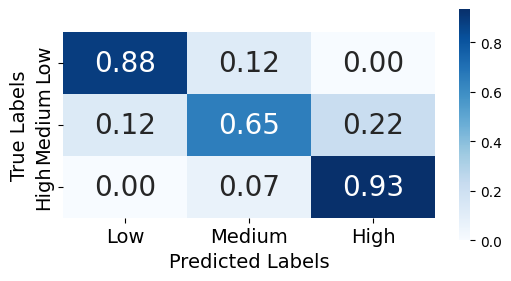

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Calculate the confusion matrix
cm = confusion_matrix(ft_qsplit['Label'], ft_qsplit['Model Output Text'], labels=["low", "medium", "high"], normalize="true")

# Plotting the confusion matrix
plt.figure(figsize=(6, 3))  # Adjust figure size to be wider and less tall
ax = sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', annot_kws={"size": 20},
                 xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])  # Set cells to be square-shaped

ax.set_aspect(0.5)
# Set the font size for the labels and ticks on both axes
ax.set_xlabel('Predicted Labels', fontsize=14)  # Adjust fontsize as needed
ax.set_ylabel('True Labels', fontsize=14)  # Adjust fontsize as needed

# Set the font size for the tick labels
ax.tick_params(axis='x', labelsize=14)  # Adjust fontsize for x-axis tick labels
ax.tick_params(axis='y', labelsize=14)  # Adjust fontsize for y-axis tick labels
# Save the figure
plt.savefig('cf_ft_qsplit.png', format='png', dpi=300)  # Specify the path, format, and DPI

plt.show()

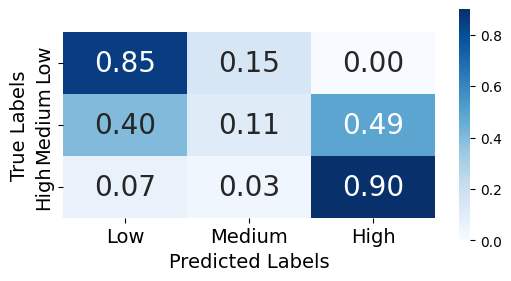

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Calculate the confusion matrix
cm = confusion_matrix(zero_qsplit['Label'], zero_qsplit['Model Output Text'], labels=["low", "medium", "high"], normalize="true")

# Plotting the confusion matrix
plt.figure(figsize=(6, 3))  # Adjust figure size to be wider and less tall
ax = sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', annot_kws={"size": 20},
                 xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])  # Set cells to be square-shaped

ax.set_aspect(0.5)
# Set the font size for the labels and ticks on both axes
ax.set_xlabel('Predicted Labels', fontsize=14)  # Adjust fontsize as needed
ax.set_ylabel('True Labels', fontsize=14)  # Adjust fontsize as needed

# Set the font size for the tick labels
ax.tick_params(axis='x', labelsize=14)  # Adjust fontsize for x-axis tick labels
ax.tick_params(axis='y', labelsize=14)  # Adjust fontsize for y-axis tick labels

plt.savefig('cf_zshot_qsplit.png', format='png', dpi=300)  # Specify the path, format, and DPI
plt.show()

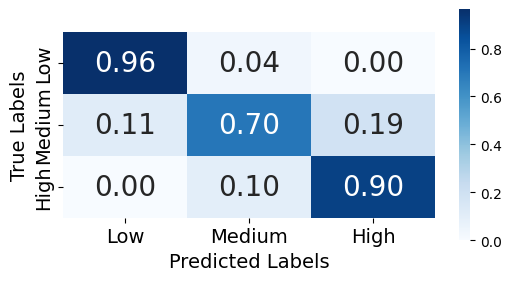

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Calculate the confusion matrix
cm = confusion_matrix(ft_metric['Label'], ft_metric['Model Output Text'], labels=["low", "medium", "high"], normalize="true")

# Plotting the confusion matrix
plt.figure(figsize=(6, 3))  # Adjust figure size to be wider and less tall
ax = sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', annot_kws={"size": 20},
                 xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"],
                 square=True)  # Set cells to be square-shaped

ax.set_aspect(0.5)
# Set the font size for the labels and ticks on both axes
ax.set_xlabel('Predicted Labels', fontsize=14)  # Adjust fontsize as needed
ax.set_ylabel('True Labels', fontsize=14)  # Adjust fontsize as needed

# Set the font size for the tick labels
ax.tick_params(axis='x', labelsize=14)  # Adjust fontsize for x-axis tick labels
ax.tick_params(axis='y', labelsize=14)  # Adjust fontsize for y-axis tick labels
plt.savefig('cf_ft_metric.png', format='png', dpi=300)  # Specify the path, format, and DPI
plt.show()

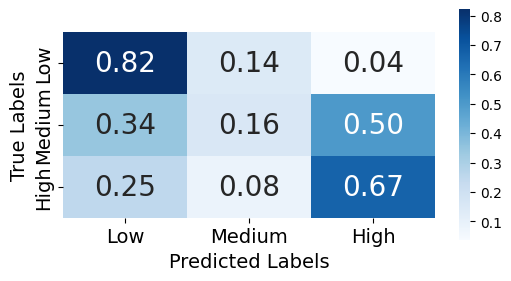

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Calculate the confusion matrix
cm = confusion_matrix(zero_metric['Label'], zero_metric['Model Output Text'], labels=["low", "medium", "high"], normalize="true")

# Plotting the confusion matrix
plt.figure(figsize=(6, 3))  # Adjust figure size to be wider and less tall
ax = sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', annot_kws={"size": 20},
                 xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"],
                 square=True)  # Set cells to be square-shaped

ax.set_aspect(0.5)
# Set the font size for the labels and ticks on both axes
ax.set_xlabel('Predicted Labels', fontsize=14)  # Adjust fontsize as needed
ax.set_ylabel('True Labels', fontsize=14)  # Adjust fontsize as needed

# Set the font size for the tick labels
ax.tick_params(axis='x', labelsize=14)  # Adjust fontsize for x-axis tick labels
ax.tick_params(axis='y', labelsize=14)  # Adjust fontsize for y-axis tick labels
plt.savefig('cf_zh_metric.png', format='png', dpi=300)  # Specify the path, format, and DPI
plt.show()

In [ ]:
metrics = ["consistency", "feasibility", "satisfaction", "understandability", "fairness", "trust", "complexity", "completeness"]

# Function to find if the prompt includes the metric and count errors
def count_metric_errors(df, metric):
    # Filter prompts that mention the metric
    metric_prompts = df[df['Prompt'].str.contains(metric, case=False)]
    # Calculate errors where true labels do not match predicted labels
    errors = (metric_prompts['Label'] != metric_prompts['Model Output Text']).sum()
    return errors

# Counting errors for each metric and storing the results
errors_per_metric_zero_metric = {metric: count_metric_errors(zero_metric, metric) for metric in metrics}
print("Errors per metric for zero_metric:", errors_per_metric_zero_metric)
errors_per_metric_ft_metric = {metric: count_metric_errors(ft_metric, metric) for metric in metrics}
print("Errors per metric for ft_metric:", errors_per_metric_ft_metric)

# Counting errors for each metric and storing the results
errors_per_metric_zero_qsplit = {metric: count_metric_errors(zero_qsplit, metric) for metric in metrics}
print("Errors per metric for zero_qsplit:", errors_per_metric_zero_qsplit)
errors_per_metric_ft_qsplit = {metric: count_metric_errors(ft_qsplit, metric) for metric in metrics}
print("Errors per metric for ft_qsplit:", errors_per_metric_ft_qsplit)


Errors per metric for zero_metric: {'consistency': 10, 'feasibility': 5, 'satisfaction': 8, 'understandability': 11, 'fairness': 12, 'trust': 12, 'complexity': 14, 'completeness': 16}
Errors per metric for ft_metric: {'consistency': 4, 'feasibility': 1, 'satisfaction': 1, 'understandability': 0, 'fairness': 4, 'trust': 8, 'complexity': 6, 'completeness': 4}
Errors per metric for zero_qsplit: {'consistency': 4, 'feasibility': 11, 'satisfaction': 12, 'understandability': 2, 'fairness': 8, 'trust': 12, 'complexity': 14, 'completeness': 16}
Errors per metric for ft_qsplit: {'consistency': 3, 'feasibility': 8, 'satisfaction': 3, 'understandability': 0, 'fairness': 0, 'trust': 12, 'complexity': 4, 'completeness': 6}


In [ ]:
# Dividing errors per metric by 24 for zero_metric
normalized_errors_zero_metric = {metric: count / 24 for metric, count in errors_per_metric_zero_metric.items()}
print("Normalized errors per metric for zero_metric:", normalized_errors_zero_metric)

# Dividing errors per metric by 24 for ft_metric
normalized_errors_ft_metric = {metric: count / 24 for metric, count in errors_per_metric_ft_metric.items()}
print("Normalized errors per metric for ft_metric:", normalized_errors_ft_metric)

# Dividing errors per metric by 24 for zero_qsplit
normalized_errors_zero_qsplit = {metric: count / 24 for metric, count in errors_per_metric_zero_qsplit.items()}
print("Normalized errors per metric for zero_qsplit:", normalized_errors_zero_qsplit)

# Dividing errors per metric by 24 for ft_qsplit
normalized_errors_ft_qsplit = {metric: count / 24 for metric, count in errors_per_metric_ft_qsplit.items()}
print("Normalized errors per metric for ft_qsplit:", normalized_errors_ft_qsplit)



Normalized errors per metric for zero_metric: {'consistency': 0.4166666666666667, 'feasibility': 0.20833333333333334, 'satisfaction': 0.3333333333333333, 'understandability': 0.4583333333333333, 'fairness': 0.5, 'trust': 0.5, 'complexity': 0.5833333333333334, 'completeness': 0.6666666666666666}
Normalized errors per metric for ft_metric: {'consistency': 0.16666666666666666, 'feasibility': 0.041666666666666664, 'satisfaction': 0.041666666666666664, 'understandability': 0.0, 'fairness': 0.16666666666666666, 'trust': 0.3333333333333333, 'complexity': 0.25, 'completeness': 0.16666666666666666}
Normalized errors per metric for zero_qsplit: {'consistency': 0.16666666666666666, 'feasibility': 0.4583333333333333, 'satisfaction': 0.5, 'understandability': 0.08333333333333333, 'fairness': 0.3333333333333333, 'trust': 0.5, 'complexity': 0.5833333333333334, 'completeness': 0.6666666666666666}
Normalized errors per metric for ft_qsplit: {'consistency': 0.125, 'feasibility': 0.3333333333333333, 'sat

In [ ]:
# Calculating accuracy for zero_metric
accuracy_zero_metric = {metric: 1 - error for metric, error in normalized_errors_zero_metric.items()}
print("Accuracy per metric for zero_metric:", accuracy_zero_metric)

# Calculating accuracy for ft_metric
accuracy_ft_metric = {metric: 1 - error for metric, error in normalized_errors_ft_metric.items()}
print("Accuracy per metric for ft_metric:", accuracy_ft_metric)

# Calculating accuracy for zero_qsplit
accuracy_zero_qsplit = {metric: 1 - error for metric, error in normalized_errors_zero_qsplit.items()}
print("Accuracy per metric for zero_qsplit:", accuracy_zero_qsplit)

# Calculating accuracy for ft_qsplit
accuracy_ft_qsplit = {metric: 1 - error for metric, error in normalized_errors_ft_qsplit.items()}
print("Accuracy per metric for ft_qsplit:", accuracy_ft_qsplit)


Accuracy per metric for zero_metric: {'consistency': 0.5833333333333333, 'feasibility': 0.7916666666666666, 'satisfaction': 0.6666666666666667, 'understandability': 0.5416666666666667, 'fairness': 0.5, 'trust': 0.5, 'complexity': 0.41666666666666663, 'completeness': 0.33333333333333337}
Accuracy per metric for ft_metric: {'consistency': 0.8333333333333334, 'feasibility': 0.9583333333333334, 'satisfaction': 0.9583333333333334, 'understandability': 1.0, 'fairness': 0.8333333333333334, 'trust': 0.6666666666666667, 'complexity': 0.75, 'completeness': 0.8333333333333334}
Accuracy per metric for zero_qsplit: {'consistency': 0.8333333333333334, 'feasibility': 0.5416666666666667, 'satisfaction': 0.5, 'understandability': 0.9166666666666666, 'fairness': 0.6666666666666667, 'trust': 0.5, 'complexity': 0.41666666666666663, 'completeness': 0.33333333333333337}
Accuracy per metric for ft_qsplit: {'consistency': 0.875, 'feasibility': 0.6666666666666667, 'satisfaction': 0.875, 'understandability': 1.

In [ ]:
# Calculate overall accuracy for zero_metric
overall_accuracy_zero_metric = sum(accuracy_zero_metric.values()) / len(accuracy_zero_metric)
print("Overall accuracy for zero_metric:", overall_accuracy_zero_metric)

# Calculate overall accuracy for ft_metric
overall_accuracy_ft_metric = sum(accuracy_ft_metric.values()) / len(accuracy_ft_metric)
print("Overall accuracy for ft_metric:", overall_accuracy_ft_metric)

# Calculate overall accuracy for zero_qsplit
overall_accuracy_zero_qsplit = sum(accuracy_zero_qsplit.values()) / len(accuracy_zero_qsplit)
print("Overall accuracy for zero_qsplit:", overall_accuracy_zero_qsplit)

# Calculate overall accuracy for ft_qsplit
overall_accuracy_ft_qsplit = sum(accuracy_ft_qsplit.values()) / len(accuracy_ft_qsplit)
print("Overall accuracy for ft_qsplit:", overall_accuracy_ft_qsplit)


Overall accuracy for zero_metric: 0.5416666666666667
Overall accuracy for ft_metric: 0.8541666666666666
Overall accuracy for zero_qsplit: 0.5885416666666666
Overall accuracy for ft_qsplit: 0.8125
